In [6]:
import numpy as np
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


### Iris dataset

In [85]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
# TSNE helps to decide if the classes are separable in nonlinear representation.
x_tsne = TSNE(learning_rate = 100).fit_transform(iris.data)

# number of features will still be the same after using PCA
x_pca = PCA().fit_transform(iris.data)

In [141]:
# demean and normalization(unit variance) before PCA 

norm = (iris.data - np.mean(iris.data))/np.std(iris.data)

print (np.var(norm), np.mean(norm))

# number of features will still be the same after using PCA
norm_pca = PCA()
norm_pca.fit(norm)

x_norm_pca = norm_pca.fit_transform(norm)

1.0 2.1316282072803005e-16


In [142]:
# principal components and exaplined variance by each components 

print (norm_pca.components_)
print (norm_pca.explained_variance_)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]
[1.08421551 0.06216666 0.02015149 0.00607775]


Text(0.5,1,'PCA after normalization')

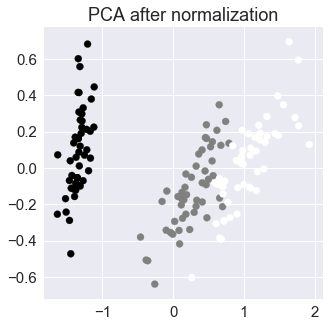

In [143]:
# PCA on normalized data 

plt.figure(figsize = (5, 5))
plt.scatter(x_norm_pca[:, 0], x_norm_pca[:, 1], c = iris.target)
plt.title('PCA after normalization')

Text(0.5,1,'PCA third and fourth principals')

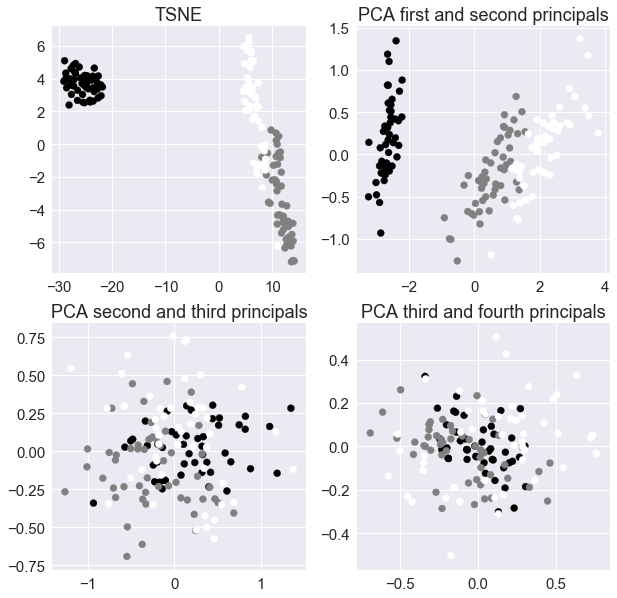

In [91]:
plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c = iris.target)
plt.title('TSNE')

plt.subplot(2, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = iris.target)
plt.title('PCA first and second principals')

plt.subplot(2, 2, 3)
plt.scatter(x_pca[:, 1], x_pca[:, 2], c = iris.target)
plt.title('PCA second and third principals')

plt.subplot(2, 2, 4)
plt.scatter(x_pca[:, 2], x_pca[:, 3], c = iris.target)
plt.title('PCA third and fourth principals')

generally speaking, iris data is linearly separable using 
- PCA, data projected onto the first and second principals
- TSNE, the lower dimension unwrapped from the higher dimension 

### python digits data 

In [34]:
# load data 

digits = load_digits()

# print(digits['DESCR'])

# 1797 images with 8 x 8 pixels each
print (digits.data.shape)
print(digits.data[9].shape)

(1797, 64)
(64,)


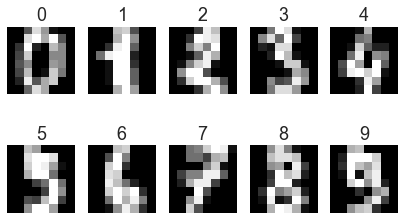

In [179]:
nrows, ncols = 2, 5
plt.figure(figsize = (7, 4))
plt.gray()

for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.imshow(digits.images[i])
#     ax.matshow(digits.images[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(digits.target[i])

#### TSNE - 8 x 8 digits data 

In [54]:
# REORDER data points according to the handwritten numbers 

x = np.vstack([digits.data[digits.target == i] for i in range(10)])
y = np.hstack([digits.target[digits.target == i] for i in range(10)])

# TSNE
digits_proj = TSNE(random_state = RS).fit_transform(x)

In [74]:
# lower dimension for x with the underlying parameters/ x
print(digits_proj.shape)

(1797, 2)


In [66]:
# a utility function used to display the transformed dataset. The color of each point refers to the actual digit 

def scatter(x, colors):
    # seaborn palette
    palette = np.array(sns.color_palette('hls', 10))
    
    fig = plt.figure(figsize = (8, 8))
    ax = plt.subplot(aspect = 'equal')
    # scatter plot of the data in the lower dimension 
    sc = ax.scatter(x[:, 0], x[:, 1], lw = 0, s = 40, c = palette[colors.astype(np.int)])
    plt.xlim(- 25, 25)
    plt.ylim(- 25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    # add labels for digits
    txts = []
    for i in range(10):
        # label position - median of all coordinates for dimension-reduced data with the same label
        xtext, ytext = np.median(x[colors == i], axis = 0)
        
        txt = ax.text(xtext, ytext, str(i), fontsize = 24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth = 5, foreground = "w"),
            PathEffects.Normal()])
        txts.append(txt)

    return fig, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(49.2311,31.146,'0'),
  Text(-5.73498,11.6717,'1'),
  Text(-41.0546,-0.102661,'2'),
  Text(17.062,-32.3343,'3'),
  Text(8.08244,46.9439,'4'),
  Text(-27.6214,-37.8453,'5'),
  Text(-31.7415,37.3498,'6'),
  Text(37.9222,-6.49064,'7'),
  Text(-2.72442,-7.81025,'8'),
  Text(-0.891617,-46.6526,'9')])

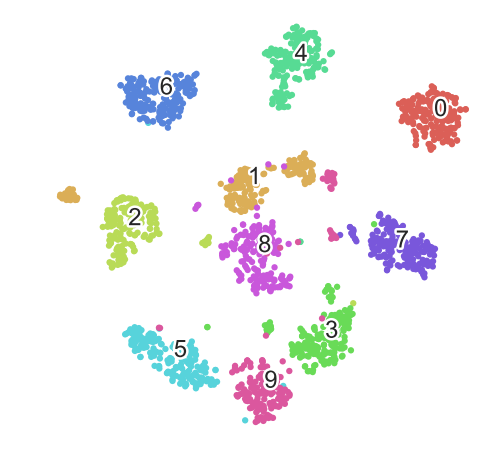

In [176]:
# scatter plot after applying TSNE

scatter(digits_proj, y)

unwrapped lower dimension from TSNE helps to visualize data separatly

#### PCA - 8 x 8 digits data 

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Text(0.5,1,'Cumulative Variance explained')

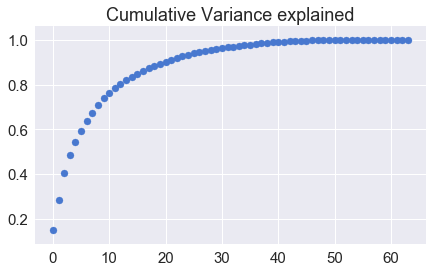

In [151]:
# normalize MNIST data for PCA

mnist_norm = (digits.data - np.mean(digits.data))/ np.std(digits.data)

# PCA
mnist_pca = PCA().fit(mnist_norm)

plt.figure(figsize = (7, 4))
plt.scatter(list(range(mnist_norm[0].shape[0])), mnist_pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative Variance explained')



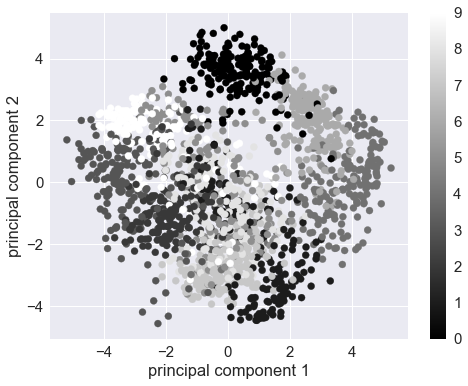

In [175]:
# fit_transform: fit the model with x and apply dimensinality reduction to x
mnist_pca = PCA().fit_transform(mnist_norm)

# projecting data to the first two principal components does not help in separating them
fig = plt.figure(figsize = (8, 6))
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c = digits.target)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar()

projecting data to the first two principal components does not help in visualizing them separatly

#### visualize top PCA eigen vectors

In [163]:
# get the top 30 principal components 
pca = PCA(n_components = 30).fit(mnist_norm)
# pca.explained_variance_ratio_

# transform the top 30 principal components to images
n_components = 30
eigen30 = pca.components_.reshape(n_components, 8, 8)

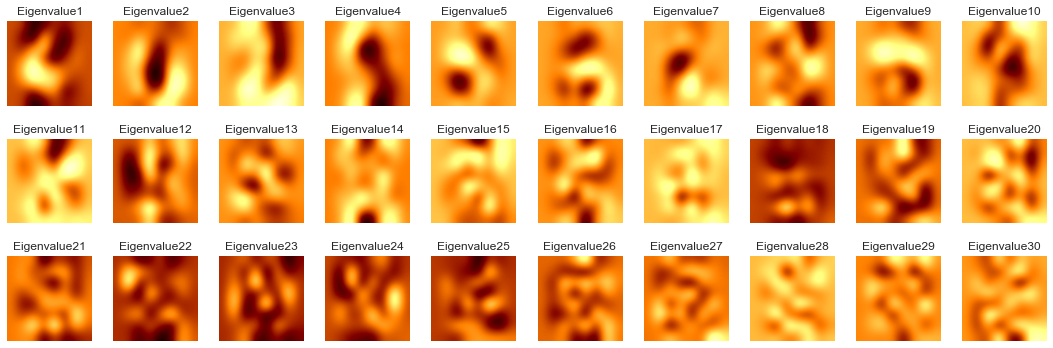

In [178]:
# plot the first 30 eigenvectors

plt.figure(figsize = (15, 15))
for i in list(range(n_components)):
    plt.subplot(9, 10, i + 1)
    plt.imshow(eigen30[i], interpolation = 'bicubic', cmap = 'afmhot')
    title_text = 'Eigenvalue' + str(i + 1)
    plt.title(title_text, size = 12)
    
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

The results give us insight into how the images vary: for example, the first few images seem to be associated with general stokes of the digtis and smooth curves, and later principal vectors seem to be picking out detailed pixels around the smooth curves.